In [ ]:
import matplotlib.pyplot as plt

Mounted at /content/drive


INFO:__main__:Removed hos_no.isna(). (141566 --> 141551)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 141500 entries, 0 to 141565
Data columns (total 43 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   pid            141500 non-null  int64         
 1   case_no        141500 non-null  int64         
 2   exam           141500 non-null  int64         
 3   fetus_no       138768 non-null  float64       
 4   hos_no         141500 non-null  int64         
 5   bpd            111776 non-null  float64       
 6   hc             110153 non-null  float64       
 7   tcd            29601 non-null   float64       
 8   ac             110088 non-null  float64       
 9   humerus        16451 non-null   float64       
 10  cm             24755 non-null   float64       
 11  fl             110561 non-null  float64       
 12  efw            107725 non-null  float64       
 13  efw_centile    88258 non-null   float64       
 14  f_heart_rate   19528 non-null   float64       
 15  

DEBUG:__main__:Index(['Hospital No', 'Fetus No', 'Mother's Date of Birth (dd/mm/yy)',
       'Gravida (no of pregnancy)', 'Parity (no of previous successful)',
       'Previous Obsteric History (SGA / FGR) o = no, 1 = yes',
       'Mother's Age at Delivery (Yrs)', 'Mother weight taken Date (dd/mm/yy)',
       'Mother Weight (kg) at first visit', 'Mother Height (cm)',
       'Mother Smoking (Yes = 1, No = 0]',
       'Hypertension - Pregancy Induced or Essential [Nil = 0, PIH = 1, Essential HpT = 2]',
       'Diabetes - Gestational or Pregestational                                     [Nil=0, GDM=1, PRE-GDM=2]',
       'Others (State)', 'Date of Delivery (dd/mm/yy)',
       'Mode of Delivery [SVD=1, Forceps=2, Vacuum=3, LSCS=4,D&C=5, Breech delivery=6]',
       'GA at birth (week)', 'GA at birth (day)',
       'GA at birth (completed weeks + days = convert to decimal point, e.g. 24 weeks + 5 days "= 24 +5/7" = 24.71)',
       'Baby Gender (F/M) (A=Ambigious)', 'Birthweight (g) ',
      

1697    1994-11-13 00:00:00
Name: m_dob, dtype: object


ERROR:__main__:Not all m_dob datetime converted. 2 datetime missing. [34522385, 35886526]
NoneType: None


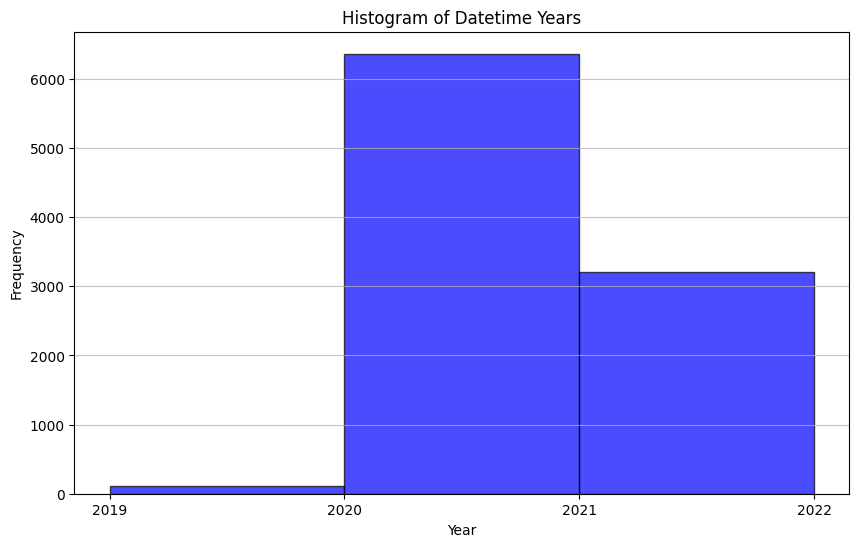

<ipython-input-2-0b8aef21c28c>:375: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tri2.dropna(thresh = len(tri2) * 0.4, axis = 1, inplace = True)
<ipython-input-2-0b8aef21c28c>:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tri3.dropna(thresh = len(tri3) * 0.4, axis = 1, inplace = True)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1886 entries, 2 to 7533
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   bpd               1886 non-null   float64
 1   hc                1886 non-null   float64
 2   tcd               1584 non-null   float64
 3   ac                1886 non-null   float64
 4   humerus           882 non-null    float64
 5   cm                1545 non-null   float64
 6   fl                1886 non-null   float64
 7   efw               1886 non-null   float64
 8   efw_centile       1886 non-null   float64
 9   af                1845 non-null   float64
 10  vp_left           845 non-null    float64
 11  nf                1185 non-null   float64
 12  ga                1886 non-null   int64  
 13  prev_failed_preg  1131 non-null   float64
 14  prev_sga_fgr      1131 non-null   float64
 15  m_age             1884 non-null   float64
 16  m_weight          1881 non-null   float64


In [ ]:
import logging
import pandas as pd
import numpy as np
import math
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

logger = logging.getLogger(__name__)
logger.setLevel(logging.DEBUG)
handler = logging.FileHandler('/content/drive/MyDrive/SGA/debug.txt', mode='w')
formatter = logging.Formatter('%(asctime)s - %(name)s - %(funcName)s - %(levelname)s - %(message)s')
handler.setFormatter(formatter)
logger.addHandler(handler)

def merge_ante_datasets():
  lst = []
  for i in range(12, 22):
      if (i >= 14) & (i<= 20):
          logger.debug('Merged dataset 20' + str(i))
          temp = pd.read_excel('/content/drive/MyDrive/SGA/with NF/data/FGR STUDY 20.05.20' + str(i) + '-19.05.20' + str(i+1) + '.xls', header = 2)
      else:
          logger.debug('Merged dataset 20' + str(i))
          temp = pd.read_excel('/content/drive/MyDrive/SGA/with NF/data/FGR STUDY 20.05.20' + str(i) + '-19.05.20' + str(i+1) + '.xls', header = 2)
      lst.append(temp)

  df = pd.concat(lst)
  df.reset_index(drop = True, inplace = True)
  return df

def rename_column(df, alternative = None):
  logger.debug(df.columns)
  df.columns = df.columns.str.lower().str.strip().str.replace(' ', '_', regex=False).str.replace(r'[, _]+', '_')
  if alternative != None:
    df = df.rename(columns = alternative)
  logger.debug(df.columns)
  #df.info()
  return df

def preprocess_ante():
  df = merge_ante_datasets()
  df = rename_column(df, alternative = {
                        'case_number': 'case_no', # the first/second/third fetus was examined in this hospital
                        'fetus' : 'fetus_no',
                        'hospital_no.' : 'hos_no',
                        'efw_(clinical)' : 'efw',
                        'efw_centile' : 'efw_centile',
                        'fetal_heart_rate': 'f_heart_rate',
                        'amniotic_fluid': 'af',
                        'af_index': 'afi',
                        'nuchal_fold_thickness': 'nf',
                        'cardiothoracic_ratio': 'ctr',
                        'vallikannu_narayanan': 'sonographer',
                        'weeks' : 'ga_week',
                        'days' : 'ga_days',
                        'umb_a_pi': 'umb_api',
                        'cerebro-placental_ratio': 'cpr',
                        'uterine_artery_pi_right': 'utapi_right',
                        'uterine_artery_pi_left': 'utapi_left',
                        'uterine_art_ri_left': 'utari_left',
                        'uterine_art_ri_right': 'utari_right',
                        'ductus_venosus_pi': 'dvpi',
                        'examination_date': 'exam_date'
                        })
  df.to_csv('/content/drive/MyDrive/SGA/with NF/data/merged_df.csv', index=0)
  return df

def to_numeric(df, col):
  len_before = len(df[df[col].notna()])
  df[col] = df[col].applymap(pd.to_numeric, errors='coerce')
  len_after = len(df[df[col].notna()])
  if len_after < len_before:
    logger.exception('No. of data before refill (' + str(len_before) + ' ) is more than after refill (' + str(len_after) + ')')
  return df

def check_hos_no(df):
  lst = [df.loc[df['hos_no'].str.contains(r'[^0-9]'), 'hos_no']]
  logger.debug(len(lst))
  logger.debug(lst)
  return lst

def to_datetimes(df, cols):
  for col in cols:
    lst1 = list(df.loc[df[col].isna(), 'hos_no'])

    df[col] = pd.to_datetime(df[col], format = '%d.%m.%Y', errors = 'coerce').fillna(
      pd.to_datetime(df[col], format = '%d//%m/%Y', errors = 'coerce')).fillna(
      pd.to_datetime(df[col], format = '%d-%b-%Y', errors = 'coerce')).fillna(
      pd.to_datetime(df[col], format = '%d/%m/%Y', errors = 'coerce')).fillna(
      pd.to_datetime(df[col], format = '%d.%m%Y', errors = 'coerce'))

    lst2 = list(df.loc[df[col].isna(), 'hos_no'])

    output = []
    for x in lst2:
      if x not in lst1 and x not in output:
        output.append(x)

    if len(lst1) != len(lst2):
      logger.exception('Not all ' + col + ' datetime converted. ' + str(len(lst2) - len(lst1)) + ' datetime missing. ' + str(output))

  return df

def drop_null(df, cols):
  for col in cols:
    len_before = len(df)
    df.drop(df[df[col].isna()].index, axis = 0, inplace = True)
    len_after = len(df)
    logger.info('Removed ' + col + '.isna(). (' + str(len_before) + ' --> ' + str(len_after) + ')')
  return df

def compute_efw_centile(df, centile_df):
    centile_df = centile_df.rename(columns={'GA' : 'ga'})

    df = pd.merge(df, centile_df, on = 'ga', how = 'left')
    refCentile = list(centile_df.columns)[1:]
    ranges = df[[2.5, 5, 10, 25, 50, 75, 90, 95, 97.5]].values.tolist()
    efw = df['efw'].values.tolist()
    centile = []

    for i in range(len(efw)):
        if efw[i] >= ranges[i][0] and efw[i] <= ranges[i][-1]:
            for j in range(len(ranges[i])):
                if efw[i] == ranges[i][j]:
                    centile.append(refCentile[j])
                    break
                if efw[i] < ranges[i][j]:
                    centile.append(refCentile[j] - (refCentile[j] - refCentile[j - 1]) * (ranges[i][j] - efw[i]) / (ranges[i][j] - ranges[i][j - 1]))
                    break
        else:
            centile.append(0)

    df['efw_centile'] = centile
    df.drop(df[df['efw_centile'] == 0].index, inplace = True)
    df['cur_sga'] = (df['efw_centile'] <= 10).astype(int)

    return df

def merge_groundtruth(df):
  gt = pd.read_csv('/content/drive/MyDrive/SGA/Ref_Centile/I21_BW.csv')
  gt.columns = gt.columns.str.lower()
  gt.rename(columns = {'ga' : 'birth_ga'}, inplace = True)
  df = pd.merge(df, gt, on = ['birth_ga', 'gender'], how = 'left')
  df['sga'] = df['bw'] / 1000 <= df['p_10']
  df['lbw'] = df['bw'] / 1000 <= 2.5
  df['sc'] = df['cur_sga'] ^ df['sga']
  df = to_numeric(df, ['sga', 'lbw', 'sc'])

  return df

def convert_feature_to_label(df, col):
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    return df

def convert_feature_to_one_hot(df, col):
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    oh = OneHotEncoder(handle_unknown='ignore')
    df_oh = pd.DataFrame(oh.fit_transform(df[[col]]).toarray())
    df = df.join(df_oh)

    rename_dict = {}

    for i, name in zip(df_oh.columns, le.classes_):
        rename_dict[i] = str(col) + '_' + str(name)

    df = df.rename(columns=rename_dict)
    df.drop(col, axis = 1, inplace = True)

    return df

def run_ante():
  df = pd.read_csv('/content/drive/MyDrive/SGA/with NF/data/merged_df.xls')

  # Fix hos_no
  df = drop_null(df, ['hos_no'])
  df.drop(df[df['hos_no'].str.contains(r'[A-Za-z]')].index, axis = 0, inplace = True)
  df.loc[df['hos_no'] == '/32487250/', 'hos_no'] = '32487250'
  df.drop(index = 127084, axis = 0, inplace = True)
  df.loc[df['hos_no'].str.contains(r'[^0-9]'), 'hos_no'] = df.loc[df['hos_no'].str.contains(r'[^0-9]'), 'hos_no'].str[:-1]
  df = to_numeric(df, ['hos_no'])

  # Calculate ga and start_date
  # ============================================================================
  df['ga'] = df['ga_week'] * 7 + df['ga_days']
  df['exam_date'] = pd.to_datetime(df['exam_date'], errors = 'coerce')
  df['start_date'] = df['exam_date'] - pd.to_timedelta(df['ga'], unit = 'D')
  # ============================================================================

  return df

def run_post():
  df = pd.read_csv('/content/drive/MyDrive/SGA/Complete Postnatal.csv')
  df.columns = df.iloc[0]
  df = df[2:]

  df = rename_column(df, alternative = {
      'hospital_no' : 'hos_no',
      'fetus_no' : 'fetus_no',
      'mother\'s_date_of_birth_(dd/mm/yy)' : 'm_dob',
      'gravida_(no_of_pregnancy)' : 'gravida',
      'parity_(no_of_previous_successful)' : 'para',
      'previous_obsteric_history_(sga_/_fgr)_o_=_no_1_=_yes' : 'prev_sga_fgr',
      'mother\'s_age_at_delivery_(yrs)' : 'm_age',
      'mother_weight_taken_date_(dd/mm/yy)' : 'm_weight_taken_date',
      'mother_weight_(kg)_at_first_visit' : 'm_weight',
      'mother_height_(cm)' : 'm_height',
      'mother_smoking_(yes_=_1_no_=_0]' : 'smoking',
      'hypertension_-_pregancy_induced_or_essential_[nil_=_0_pih_=_1_essential_hpt_=_2]' : 'hypertension',
      'diabetes_-_gestational_or_pregestational_[nil=0_gdm=1_pre-gdm=2]' : 'diabetes',
      'others_(state)' : 'other',
      'date_of_delivery_(dd/mm/yy)' : 'delivery_date',
      'mode_of_delivery_[svd=1_forceps=2_vacuum=3_lscs=4_d&c=5_breech_delivery=6]' : 'mode_of_delivery',
      'ga_at_birth_(week)' : 'birth_ga_week',
      'ga_at_birth_(day)' : 'birth_ga_days',
      'ga_at_birth_(completed_weeks_+_days_=_convert_to_decimal_point_e.g._24_weeks_+_5_days_"=_24_+5/7"_=_24.71)' : 'birth_ga_float',
      'baby_gender_(f/m)_(a=ambigious)' : 'gender',
      'birthweight_(g)' : 'bw',
      'birth_length_(cm)' : 'birth_length',
      'head_circumference_(cm)' : 'birth_hc',
      'apgar_score_(1min)' : 'apgar_1min',
      'apgar_score_(5min)' : 'apgar_5min',
      'neonatal_outcome_(alive_=_1/_dead_=_2)' : 'neonatal_outcome',
      'admission_to_nicu/_picu/_ward_[nicu/scn=1_picu=2_ward=3_maternity_(not_admitted)_postnatal_ward=4_mortuary=5]' : 'morbidity',
      'death_diagnosis_(no_death_=_0_yes_=_1)' : 'death',
      'date_to_diagnosis_of_iugr' : 'iugr_diagnosis_date',
      'iugr_tri2_status_(0/1)' : 'tri2_iugr',
      'iugr_tri3_status_(0/1)' : 'tri3_iugr',
      'intervention/treatment' : 'treatment',
      'date_to_recovery_\nif_not_enter_the_date_of_delivery_(dd/mm/yy)' : 'recovery_date',
      'admission_diagnosis_(baby)' : 'admission_diagnosis'
  })

  # Remove entries with no ['hos_no', 'bw', 'gender']
  df = drop_null(df, ['hos_no', 'bw', 'gender'])

  # Remove twins
  twin_lst = list(df[df['fetus_no'] != '1']['hos_no'])
  df.drop(df[df['hos_no'].isin(twin_lst)].index, axis = 0, inplace = True)
  df.drop(df[df['gravida'] == df['para']].index, axis = 0, inplace = True)

  # Fix weird values in ['hos_no', 'birth_ga_week', 'gender', 'delivery_date', 'm_dob]
  # ============================================================================
  # print(check_hos_no(df))
  df['hos_no'] = df['hos_no'].replace('3.58E+07', '35813275')
  df.drop(df[df['birth_ga_week'] == 'EDD'].index, axis = 0, inplace = True)
  df['gender'].replace(['A', 'B', '0'], np.nan, inplace = True)
  df['delivery_date'] = df['delivery_date'].replace('00/09/2020', '01.09.2020')
  df.loc[df['hos_no'] == '34522385', 'm_dob'] = pd.to_datetime('13/11/1994')
  print(df.loc[df['hos_no'] == '34522385', 'm_dob'])
  # ============================================================================

  # Convert numeric columns to float64
  # Convert ['m_dob', 'delivery_date'] to datetime
  # ============================================================================
  num_col = ['hos_no', 'gravida', 'para', 'prev_sga_fgr', 'smoking', 'hypertension', 'diabetes', 'bw', 'birth_ga_week', 'birth_ga_days', 'm_weight', 'm_height']
  df = to_numeric(df, num_col)

  df = to_datetimes(df, ['m_dob', 'delivery_date'])
  # ============================================================================

  # Calculate birth_ga, birth_start_date, m_age, prev_failed_preg, bmi
  # ============================================================================
  df['birth_ga'] = df['birth_ga_week'] * 7 + df['birth_ga_days']
  df = to_numeric(df, ['birth_ga'])

  df['birth_start_date'] = df['delivery_date'] - pd.to_timedelta(df['birth_ga'], unit = 'D')

  df['m_age'] = (df['birth_start_date'].dt.month < df['m_dob'].dt.month) | ((df['birth_start_date'].dt.month == df['m_dob'].dt.month) & (df['birth_start_date'].dt.day < df['m_dob'].dt.day))
  df = to_numeric(df, ['m_age'])
  df['m_age'] = df['birth_start_date'].dt.year - df['m_dob'].dt.year - df['m_age']

  df['prev_failed_preg'] = df['gravida'] - df['para'] - 1

  df['bmi'] = df['m_weight'] / ((df['m_height'] / 100) ** 2)
  # ============================================================================

  # Cross check 'para' with 'neonatal outcome', 'admission_diagnosis', 'morbidity', 'death'
  # v = df['hos_no'].value_counts()
  # df[df['hos_no'].isin(v.index[v.gt(1)])][['gravida', 'para', 'prev_sga_fgr', 'death', 'neonatal_outcome', 'admission_diagnosis', 'morbidity', 'other']]

  # Remove dead fetus
  df['other'] = df['other'].str.lower()
  df['admission_diagnosis'] = df['admission_diagnosis'].str.lower()
  fetal_death = df[(df['other'].str.contains('miscarriage|miscarraiges|abortion|death') ==True)]
  fetal_death = fetal_death[~fetal_death['other'].str.contains('hx of|history|h/o|threatened') ==True]
  df.drop(df[(df['neonatal_outcome'] == '2') | (df['morbidity'] == '5') | (df['death'] == '1') | (df['hos_no'].isin(fetal_death['hos_no']) | (df['admission_diagnosis'].str.contains('passed away') ==True) | (df['other'].str.contains('still birth') ==True))].index, axis = 0, inplace = True)

  # Remove out-of-range birth_ga
  df.drop(df[(df['birth_ga'] < 168) | (df['birth_ga'] > 300)].index, axis = 0, inplace = True)

  # Obtain useful columns
  df = df[['hos_no', 'm_dob', 'prev_failed_preg', 'prev_sga_fgr', 'm_age', 'm_weight', 'm_height', 'smoking', 'hypertension', 'diabetes', 'other', 'delivery_date', 'gender', 'bw', 'birth_ga', 'bmi', 'birth_start_date']]

  return df

def run_ante_post(ante, post):
  # Merge hos_no with consideration of exam_date and delivery_date, exam_date within 307 days before delivery_date
  df = pd.merge(ante, post, on='hos_no', how='outer')
  df['date_diff'] = (df['delivery_date'] - df['exam_date']).dt.days
  df = df[(df['exam_date'] <= df['delivery_date']) & (df['exam_date'] >= df['delivery_date'] - pd.Timedelta(days=307))]

  year = df['exam_date'].dt.year
  # Plot histogram
  plt.figure(figsize=(10, 6))
  plt.hist(year, bins=range(min(year), max(year) + 1), color='blue', edgecolor='black', alpha=0.7)
  plt.xlabel('Year')
  plt.ylabel('Frequency')
  plt.title('Histogram of Datetime Years')
  plt.xticks(range(min(year), max(year) + 1))
  plt.grid(axis='y', alpha=0.75)
  plt.show()

  # Group preg into id
  df.sort_values(by = ['hos_no', 'start_date'], inplace = True)
  df.reset_index(drop = True, inplace = True)
  df['id'] = ((df['hos_no'] != df['hos_no'].shift(1)) | (df['start_date'] > df['start_date'].shift(1) + pd.to_timedelta(7, unit = 'D'))).astype(int)
  df['id'] = np.cumsum(list(df['id']))

  # Recalculate start_date using mode within group of preg
  newStartDate = df.groupby(['id'])['start_date'].agg(lambda x: pd.Series.mode(x, dropna = True)[0]).to_dict()
  df['start_date'] = df['id'].apply(lambda x: newStartDate.get(x))

  # Recalculate ga and birth ga
  df['ga'] = (df['exam_date'] - df['start_date']).dt.days
  df['birth_ga'] = (df['delivery_date'] - df['start_date']).dt.days

  # Remove non-singleton
  non_singleton_id = set(df[(df['fetus_no'] != 1) & (df['fetus_no'].notna())]['id'])
  df.drop(df[df['id'].isin(non_singleton_id)].index, axis = 0, inplace = True)

  # Cross check ['hypertension', 'diabetes', 'smoking', 'af'] with 'other'
  # ============================================================================
  df.drop(df[(df['other'].str.contains('twin') ==True)].index, axis = 0, inplace = True)
  df.loc[df['other'].str.contains('hypertension|pih|hpt') == True, 'hypertension'] = 1
  df.loc[df['other'].str.contains('gdm') == True, 'diabetes'] = 1
  df.loc[df['other'].str.contains('heavy smoker') == True, 'smoking'] = 1
  df.loc[(df['other'].str.contains('polyhydramnios')) & (df['af'].isna()), 'af'] = 'polyhydramnios'
  df.loc[(df['other'].str.contains('oligohydramnios|oligohydramnions|olygohydromnios|oligohydramnion|oligohydraomnios')) & (df['af'].isna()), 'af'] = 'oligohydramnios'
  # ============================================================================

  # Recalculate bpd, hc, ac, fl, efw, cpr, af, efw_centile
  # ============================================================================
  df['fl'] = np.where(df['fl'].isna(), df['ac'] * 0.22, df['fl'])
  df['bpd'] = np.where(df['bpd'].isna(), (df['hc'] * 78) / (89 * math.pi), df['bpd'])
  df['fl'] = np.where(df['fl'].isna(), df['bpd'] * 0.79, df['fl'])
  df['ac'] = np.where(df['ac'].isna(), df['fl'] / 0.22, df['ac'])
  df['bpd'] = np.where(df['bpd'].isna(), df['fl'] /0.79, df['bpd'])
  df['hc'] = np.where(df['hc'].isna(), df['bpd'] * (89 * math.pi) / 78, df['hc'])
  df['efw'] = np.where(df[['bpd', 'ac', 'hc', 'fl']].notna().all(1), round(10 ** (1.3596 + 0.0064 * df['hc'] / 10 + 0.0424 * df['ac'] / 10 + 0.174 * df['fl'] / 10 + 0.00061 * df['bpd'] / 10 * df['ac'] / 10 - 0.00386 * df['ac']  / 10 * df['fl'] / 10)), df['efw'])
  df['cpr'] = np.where(df[['mcapi', 'uapi']].notna().all(1), df['mcapi'] / df['uapi'], df['cpr'])
  df['af'] = np.where(df['afi'].notna(), pd.cut(df['afi'], bins = [0, 5, 25, np.inf], labels = ['oligohydramnios', 'normal', 'polyhydramnios']),df['af'])
  df['af'].replace({'increased' : 'polyhydramnios', 'anhydramnios' : 'oligohydramnios', 'reduced' : 'oligohydramnios'}, inplace = True)

  centile_df = pd.read_excel('/content/drive/MyDrive/SGA/Prev/EFW centile.xlsx')
  df = compute_efw_centile(df, centile_df)
  # ============================================================================

  return df

def with_groundtruth(df):
  # Obtain ['sga', 'lbw', 'sc']
  df = merge_groundtruth(df)

  # OHE
  df = convert_feature_to_label(df, 'gender')
  df = df.replace({'oligohydramnios' : 0, 'normal' : 1, 'polyhydramnios' : 2})

  # Split into tri2, tri3
  tri2 = df[df['ga'] < 182]
  tri3 = df[df['ga'] >= 182]

  # Remove column with less data (thresh = 40%)
  tri2.dropna(thresh = len(tri2) * 0.4, axis = 1, inplace = True)
  tri3.dropna(thresh = len(tri3) * 0.4, axis = 1, inplace = True)

  # Obtain useful columns
  tri2 = tri2[['bpd', 'hc', 'tcd', 'ac', 'humerus', 'cm', 'fl', 'efw', 'efw_centile', 'af', 'vp_left', 'nf', 'ga', 'prev_failed_preg', 'prev_sga_fgr', 'm_age', 'm_weight', 'm_height', 'smoking', 'diabetes', 'hypertension', 'gender', 'bw', 'bmi', 'id', 'cur_sga', 'birth_ga', 'sga', 'lbw', 'sc']]
  tri3 = tri3[['bpd', 'hc', 'ac', 'fl', 'efw', 'efw_centile', 'af', 'afi', 'ga', 'prev_failed_preg', 'prev_sga_fgr', 'm_age', 'm_weight', 'm_height', 'smoking', 'diabetes', 'hypertension', 'gender', 'bw', 'bmi', 'id', 'cur_sga', 'birth_ga', 'sga', 'lbw', 'sc']]

  return tri2, tri3

ante = run_ante()
ante.info()
ante.to_csv('/content/drive/MyDrive/SGA/with NF/data/antw_withNF.xls')
post = run_post()
ante_post = run_ante_post(ante, post)
tri2, tri3 = with_groundtruth(ante_post)
tri2.info()
tri3.info()
tri2.to_csv('/content/drive/MyDrive/SGA/with NF/data/cleaned_tri2.csv')
tri3.to_csv('/content/drive/MyDrive/SGA/with NF/data/cleaned_tri3.csv')